In [1]:
import os
os.chdir('../../')

import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *
import Processing.dataset_filter as processors

if not os.path.exists('./result/DeepDTA'):
    os.makedirs('./result/DeepDTA')

In [2]:
df = pd.read_csv('./data/r1/title_r1_5k.csv', sep = ',', error_bad_lines=False)
X_drug, X_target, y = df['Drug'].values, df['Target'].values, df['Label'].values

drug_encoding = 'CNN'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, X_target, y,
                                drug_encoding, target_encoding,
                                split_method='random',frac=[0.7,0.1,0.2])

# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = generate_config(drug_encoding = drug_encoding,
                         target_encoding = target_encoding,
                         cls_hidden_dims = [1024,1024,512],
                         train_epoch = 100,
                         LR = 0.001,
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12]
                         )


Drug Target Interaction Prediction Mode...
in total: 5000 drug-target pairs
encoding drug...
unique drugs: 4857
encoding protein...
unique target sequence: 1033
splitting dataset...
Done.


Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 52.1614. Total time 0.00055 hours
Validation at Epoch 1 with loss:4.52435, MSE: 4.35269 , Pearson Correlation: 0.06471 with p-value: 1.48E-01 , Concordance Index: 0.51051
Training at Epoch 2 iteration 0 with loss 4.03841. Total time 0.01361 hours
Validation at Epoch 2 with loss:2.19096, MSE: 2.10495 , Pearson Correlation: 0.10506 with p-value: 1.88E-02 , Concordance Index: 0.52113
Training at Epoch 3 iteration 0 with loss 2.84746. Total time 0.02944 hours
Validation at Epoch 3 with loss:2.05506, MSE: 2.10557 , Pearson Correlation: 0.13525 with p-value: 2.44E-03 , Concordance Index: 0.53132
Training at Epoch 4 iteration 0 with loss 2.36183. Total time 0.05388 hours
Validation at Epoch 4 with loss:1.90673, MSE: 2.12776 , Pearson Correlation: 0.17364 with p-value: 9.51E-05 , Concordance Index: 0.54448
Training at Epoch 5 iteration 0 with loss 2.63611. Total time 0.07833 hours
Valida

Training at Epoch 39 iteration 0 with loss 0.57629. Total time 0.88944 hours
Validation at Epoch 39 with loss:1.93571, MSE: 1.93638 , Pearson Correlation: 0.42311 with p-value: 3.90E-23 , Concordance Index: 0.63753
Training at Epoch 40 iteration 0 with loss 0.62717. Total time 0.91333 hours
Validation at Epoch 40 with loss:2.17282, MSE: 2.37771 , Pearson Correlation: 0.41983 with p-value: 9.07E-23 , Concordance Index: 0.63739
Training at Epoch 41 iteration 0 with loss 0.89547. Total time 0.93944 hours
Validation at Epoch 41 with loss:1.67181, MSE: 2.09789 , Pearson Correlation: 0.40855 with p-value: 1.54E-21 , Concordance Index: 0.63351
Training at Epoch 42 iteration 0 with loss 0.46516. Total time 0.96416 hours
Validation at Epoch 42 with loss:2.27630, MSE: 2.31785 , Pearson Correlation: 0.41906 with p-value: 1.10E-22 , Concordance Index: 0.63665
Training at Epoch 43 iteration 0 with loss 0.91657. Total time 0.99027 hours
Validation at Epoch 43 with loss:2.01561, MSE: 2.00179 , Pearso

Validation at Epoch 77 with loss:2.24169, MSE: 2.14424 , Pearson Correlation: 0.39883 with p-value: 1.64E-20 , Concordance Index: 0.62866
Training at Epoch 78 iteration 0 with loss 0.13886. Total time 1.82111 hours
Validation at Epoch 78 with loss:1.81468, MSE: 2.14814 , Pearson Correlation: 0.38682 with p-value: 2.71E-19 , Concordance Index: 0.62405
Training at Epoch 79 iteration 0 with loss 0.13172. Total time 1.845 hours
Validation at Epoch 79 with loss:2.21049, MSE: 2.21642 , Pearson Correlation: 0.38128 with p-value: 9.51E-19 , Concordance Index: 0.62252
Training at Epoch 80 iteration 0 with loss 0.16041. Total time 1.87 hours
Validation at Epoch 80 with loss:2.22568, MSE: 2.18049 , Pearson Correlation: 0.38749 with p-value: 2.32E-19 , Concordance Index: 0.62434
Training at Epoch 81 iteration 0 with loss 0.12747. Total time 1.89388 hours
Validation at Epoch 81 with loss:2.42142, MSE: 2.26525 , Pearson Correlation: 0.38337 with p-value: 5.94E-19 , Concordance Index: 0.62436
Trainin

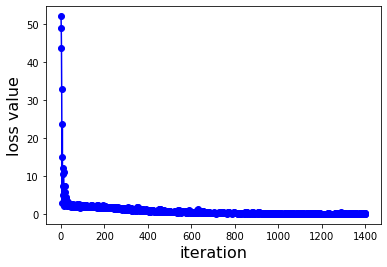

In [3]:
model = models.model_initialize(**config)
model.train(train, val, test)

In [4]:
model.save_model('./result/DeepDTA/r1/model_r1_5k_100epochs')